In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

#### The formal code

In [9]:
# test the shape file
# test the shapefile
# try the new code of plotting
import seaborn as sns
import shapefile

# load the shape file of the Beijing Road
shapefile_path = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\tl_2016_26_cousub\tl_2016_26_cousub.shp'
file = shapefile.Reader(shapefile_path)

# bound of michigan
lat_min = 42.222296
lng_min = -83.808132
lat_max = 42.325966
lng_max = -83.673738

In [3]:
l = file.records()
lat = list(map(lambda x: np.float(x), [x[-2] for x in l]))
lng = list(map(lambda x: np.float(x), [x[-1] for x in l]))

In [4]:
for shapeRecord in file.shapeRecords():
    record = shapeRecord.shape.points
    break
    

In [ ]:
def points_in_region()

In [8]:
record[0][0]

-84.968604

In [2]:
# test the shapefile
# try the new code of plotting
import seaborn as sns
import shapefile

# load the shape file of the Beijing Road
shapefile_path = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\MichiganStateRoads_v17a'
file = shapefile.Reader(r'State_Owned_Roads_v17a.shp')



l = file.records()
L = list(set([x[3] for x in l]))



l_shape = []
n = 0
min_shapeLat = min([x[1] for x in file.shapeRecords()[0].shape.points])
max_shapeLat = max([x[1] for x in file.shapeRecords()[0].shape.points])
min_shapeLng = min([x[0] for x in file.shapeRecords()[0].shape.points])
max_shapeLng = max([x[0] for x in file.shapeRecords()[0].shape.points])
for shapeRecord in file.shapeRecords():
    n = n+1
    if n%10000 == 0:
        print(n)
    isPrimary = shapeRecord.record[3] in [ 'motorway', 'primary', 'trunk']  # motorway: have sixth ring
    #isInBox = (min([x[1] for x in shapeRecord.shape.points]) >= min_lat) & (max([x[1] for x in shapeRecord.shape.points]) <= max_lat) & (min([x[0] for x in shapeRecord.shape.points]) >= min_lng) & (max([x[0] for x in shapeRecord.shape.points]) <= max_lng) 
    if isPrimary: #& isInBox:
        l_shape.append(shapeRecord)
        min_shapeLat = min(min([x[1] for x in shapeRecord.shape.points]), min_shapeLat)
        max_shapeLat = max(max([x[1] for x in shapeRecord.shape.points]), max_shapeLat)
        min_shapeLng = min(min([x[0] for x in shapeRecord.shape.points]), min_shapeLng)
        max_shapeLng = max(max([x[0] for x in shapeRecord.shape.points]), max_shapeLng)



10000
20000
30000
40000
50000


In [3]:
path = r'C:\Users\Zhaobin\Desktop\Didi\Git\data_output\visialization\hist_idleDist\top10p_3period\filtered_addedTagTimeDistHex_DoubleSize\\'
filename = 'top10p_tra_2017Nov7am10am1101_doubleGrid.csv'
df = pd.read_csv(path + filename)

In [94]:
# get the subdf
init_time = pd.to_datetime('2013-11-27 07:00:00')
end_time = pd.to_datetime('2013-11-27 09:59:59')

df['current_time'] = pd.to_datetime(df['current_time'])
df['t_diff'] = df['current_time'].apply(lambda x: (x-init_time).total_seconds())

df['int_t_diff'] = df['t_diff'].apply(lambda x : int(x/10))
df['current_lat'] = df['current_lat'].astype(float)
df['current_lng'] = df['current_lng'].astype(float)
# average the lat and lng at the same time
grouped = df.groupby(['phone','int_t_diff'])
gdf = pd.DataFrame(grouped['current_lat'].sum() / grouped['current_lat'].count())
gdf.columns = ['ave_lat']
gdf['ave_lng'] = grouped['current_lng'].sum() / grouped['current_lng'].count()
gdf['state'] = grouped['state'].min()
gdf = gdf.reset_index()
l_time = list(sorted(set(df['int_t_diff'].tolist())))


KeyError: 'current_lat'

In [6]:
len(df[df['state'] == 1]) / len(df[df['state'] == 9999])
len(gdf[gdf['state'] == 1]) / len(gdf[gdf['state'] == 9999])

12.745126567451265

In [33]:
max(l_time)

1080

In [7]:
gdf.head()

,phone,int_t_diff,ave_lat,ave_lng,state
0,13001005038,42,39.844470,116.293706,1
1,13001005038,43,39.844455,116.293708,1
2,13001005038,44,39.844438,116.293699,1
3,13001005038,45,39.844436,116.293701,1
4,13001005038,46,39.844435,116.293700,1


In [38]:
[lng[i] for i in filtered]

IndexError: list index out of range

In [96]:
# read the traj data
df = pd.read_csv(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data\1107csv.csv',
                 header = None)

In [97]:
# get the subdf
init_time = pd.to_datetime('2013-11-27 07:00:00')
end_time = pd.to_datetime('2013-11-27 09:59:59')
df.columns = ['id', 'trip_id', 'current_lat', 'current_lng', 'v_vel', 'current_time']
df['id'] = df['id'].astype(int)
df['trip_id'] = df['trip_id'].astype(int)
df['current_time'] = pd.to_datetime(df['current_time'])
mask_latlng = (df['current_lat']>=lat_min) & (df['lat']<= lat_max) & (df['lng']>=lng_min) & (df['lng'] <= lng_max)
mask_datetime = (df['current_time']>=init_time) & (df['current_time']<=end_time)
df_inAB = df.loc[mask_latlng & mask_datetime,:]
df_inAB.head()
df = df_inAB

KeyError: 'lat'

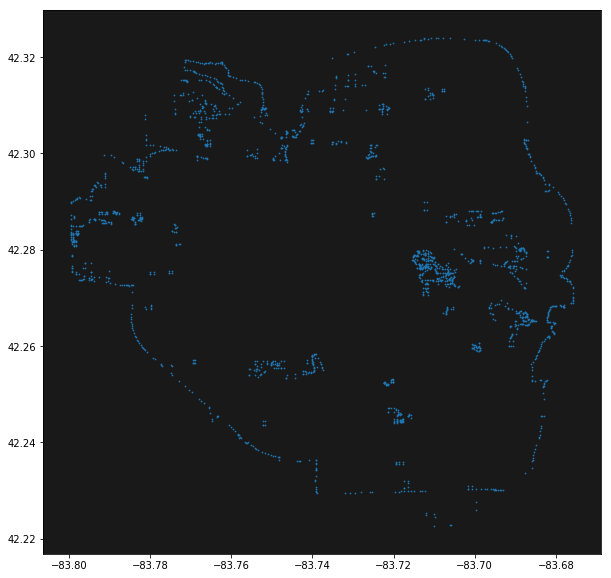

In [74]:
import matplotlib.gridspec
import pandas as pd
import matplotlib.pyplot as plt



def state2color(x):
    if x == 9999:
        return  'yellow'#'#E6E6E6'
    else:
        return   '#6666ff'          #'#009a00'


# plot the shapefile
fig = plt.figure(frameon=False) 
fig.set_size_inches(10,10)
#fig.patch.set_facecolor('black')
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#ax.set_facecolor((1,0,0))
#gs1 = matplotlib.gridspec.GridSpec(1, 1)
#gs1.update(wspace=0)
ax1=plt.subplot(1,1,1,facecolor='#191919')
#ax1.set_facecolor()

def delete_the_abormal_lat_lng(lat, lng, gap_lat, gap_lng):
    dif_lat = np.diff(lat); dif_lng = np.diff(lng)
    list_idxs = []
    idxs = [0]
    for i in range(len(lat)-1):
        if (abs(lat[i] - lat[i+1])<=gap_lat) & (abs(lng[i] - lng[i+1])<=gap_lng):
            idxs.append(i+1)
        else:
            list_idxs.append(idxs)
            idxs = [i+1]
    list_idxs.append(idxs)
    return list_idxs
for shpR in file.shapeRecords():
    lat = [x[1] for x in shpR.shape.points]
    lng = [x[0] for x in shpR.shape.points]
    if (max(lat)<=lat_max) & (min(lat)>=lat_min) & (max(lng)<=lng_max) & (min(lng) >= lng_min):
            ax1.scatter(lng, lat,s = 0.5)
        #list_idxs = delete_the_abormal_lat_lng(lat, lng, 0.001, 0.001)
        #for idxs in list_idxs:
            #if idxs:
                #ax1.([lng[i] for i in filtered],[lat[i] for i in filtered])


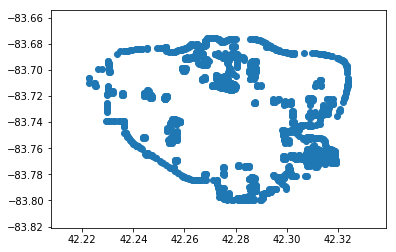

In [19]:
plt.scatter(lat,lng)

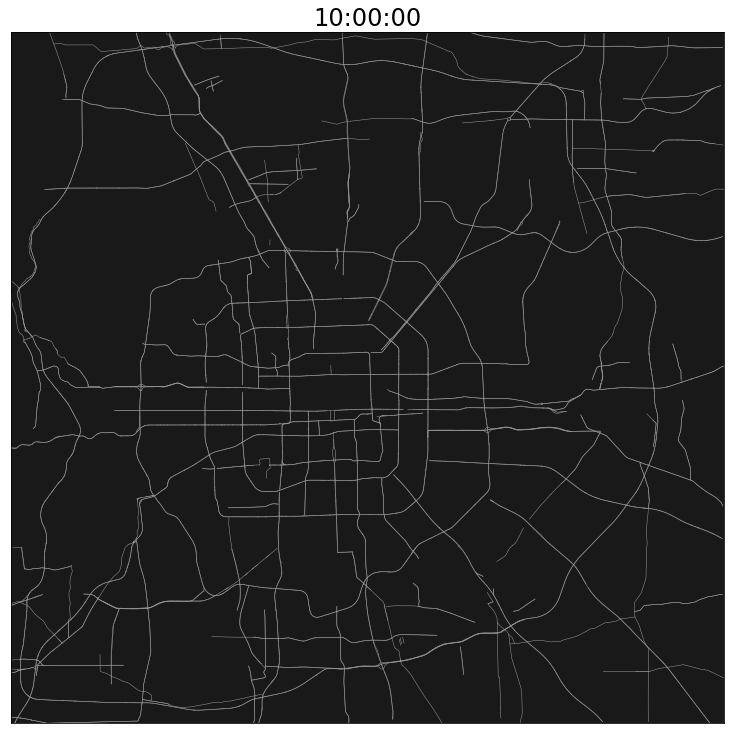

In [34]:
import matplotlib.gridspec
import pandas as pd
import matplotlib.pyplot as plt



def state2color(x):
    if x == 9999:
        return  'yellow'#'#E6E6E6'
    else:
        return   '#6666ff'          #'#009a00'


# plot the shapefile
fig = plt.figure(frameon=False) 
fig.set_size_inches(10,10)
#fig.patch.set_facecolor('black')
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#ax.set_facecolor((1,0,0))
#gs1 = matplotlib.gridspec.GridSpec(1, 1)
#gs1.update(wspace=0)
ax1=plt.subplot(1,1,1,facecolor='#191919')
#ax1.set_facecolor()
for shpR in l_shape:
    lat = [x[1] for x in shpR.shape.points]
    lng = [x[0] for x in shpR.shape.points]
    if max(lat)<=lat_max & min(lat)>=lat_min & max(lng)<=lng_max & min(lng) >= lng_min:
        ax1.plot(lng,lat,'#999999',Linewidth = 0.5)
    else:
        pass


color_ept = 'yellow'
color_ocp = '#6666ff'



for idx in range(0, 1081, 2):
    subdf = gdf[gdf['int_t_diff'] == l_time[idx] ]
    x_ept = np.array(subdf.loc[subdf['state']==9999,'ave_lng'].tolist())
    y_ept = np.array(subdf.loc[subdf['state']==9999,'ave_lat'].tolist())
    x_ocp = np.array(subdf.loc[subdf['state']==1,'ave_lng'].tolist())
    y_ocp = np.array(subdf.loc[subdf['state']==1,'ave_lat'].tolist())

    # ---------------------------------------------
    #         # we need to plot the two color with different size #
    # the color
    # state_list = subdf['state'].tolist()
    # color_list = list(map(state2color,state_list))
    #--------------------------------------------------

    p1 = ax1.scatter(x_ept, y_ept, 20,facecolors=color_ept, edgecolors=color_ept)
    p2 = ax1.scatter(x_ocp, y_ocp, 10,facecolors = color_ocp, edgecolors=color_ocp)

    plt.xlim(min_shapeLng,max_shapeLng)
    plt.ylim(min_shapeLat,max_shapeLat)
    plt.xticks([]); plt.yticks([])

    # ad the current time
    currentTime = init_time + pd.Timedelta(seconds=idx*10)
    currentTimeStr = str(currentTime.hour).zfill(2) + ':' + str(currentTime.minute).zfill(2) + ':' + str(currentTime.second).zfill(2)
    plt.title(currentTimeStr, fontsize = 24)
    plt.tight_layout(pad=0, w_pad=0, h_pad=1.0)
    plt.savefig(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_changeColor5_1101\\{}.png'.format(idx))

    p1.remove()
    p2.remove()

In [25]:
idx

198819

#### make video

In [ ]:
# trail 1
import cv2

def getFrame(video, svPath):
    cap = cv2.VideoCapture(videoPath)
    numFrame = 0
    while True:
        if cap.grab():
            flag, frame = cap.retrieve()
            if not flag:
                continue
            else:
                numFrame += 1
                newPath = svPath + str(numFrame) + ".png"
                cv2.imencode('.png', frame)[1].tofile(newPath)
        
        if cv2.waitKey(10) == 27:
            print('break at {}'.format(numFrame))
            break

            
savePicturePath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase\\'
videoPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\video\\'
getFrame(videoPath, savePicturePath)
                


In [9]:
# trail two
import imageio

imgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_donwsize\\'
filenames = []
time_range = 1080
for i in range(0, time_range):
    filenames.append( imgPath + str(i) + '.jpg' )

images = []
n = 0
for filename in filenames:
    n = n + 1
    if n%10 == 0:
        print(n)
    images.append(imageio.imread(filename))
imageio.mimsave('./downsizeManul.gif', images, duration = 0.015)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080


In [6]:
# resize the image
import cv2
oldImgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase\\'
newImgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_donwsize\\'
cropSize = (480,480)
timeRange = 1080

n = 0
for i in range(timeRange):
    n = n + 1
    if n%10 == 0:
        print(n)
    imgName = oldImgPath + str(i) + '.png'
    img = cv2.imread(imgName)
    img_new = cv2.resize(img, cropSize, interpolation = cv2.INTER_CUBIC)
    cv2.imwrite( newImgPath + str(i) + ".jpg", img_new)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080


In [12]:
# delete file
import os
imgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_even\\'
for idx in range(0,1080,2):
    os.remove(imgPath + str(idx) + '.png')
    